In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw = pd.read_csv('raw.csv')

In [6]:
raw.head()

,Gene ID,tAIg,cTE,nTE,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),...,RNAPII - Bahler,SR - Mata (1),SR - Mata (2),SR - Mata (3),SR - Mata (4),SR - Cramer,SR - Mata (5),SR - Gagneur,AB - Cramer,AB - Bahler
0,SPAC1002.01,0.338398,43.575419,44.692737,28.498022,35.422910,17.153806,11.679983,20.955701,38.309080,...,0.7455,0.011188,0.009001,0.125687,0.177002,0.107046,0.008323,NaN,2.648950,0.46
1,SPAC1002.02,0.371465,48.471616,51.965066,27.874361,21.904829,36.890500,14.767742,19.691923,32.343246,...,1.1885,0.094494,0.120246,0.130196,0.278175,0.264621,0.081438,NaN,6.939296,3.80
2,SPAC1002.03c,0.379758,48.429036,50.379198,19.191070,15.344319,62.672739,16.026438,106.958378,47.757217,...,0.8415,0.260051,0.325245,0.072350,0.209065,0.110844,0.104501,0.203666,8.534019,7.20
3,SPAC1002.04c,0.343140,40.703518,41.206030,39.617230,41.584030,47.137937,20.261897,16.770951,26.731060,...,1.5820,0.024495,0.023336,0.093210,0.181123,0.496745,0.036303,0.306748,10.816371,1.40
4,SPAC1002.05c,0.339384,41.258741,43.496503,23.268270,26.402010,62.249208,27.915293,14.874320,20.387806,...,0.8435,0.015490,0.013652,0.031450,0.056622,0.126649,0.017679,0.111857,2.682726,0.52


In [7]:
raw.columns

Index(['Gene ID', 'tAIg', 'cTE', 'nTE', 'HL - Mata (1)', 'HL - Mata (2)',
       'HL - Mata (3)', 'HL - Mata (4)', 'HL - Cramer', 'HL - Mata (5)',
       'HL - Gagneur', 'RNAPII - Bahler', 'SR - Mata (1)', 'SR - Mata (2)',
       'SR - Mata (3)', 'SR - Mata (4)', 'SR - Cramer', 'SR - Mata (5)',
       'SR - Gagneur', 'AB - Cramer', 'AB - Bahler'],
      dtype='object')

In [9]:
test=['Gene ID']
for i in raw.columns:
    if 'HL' in i:
        test.append(i)

In [10]:
altered = raw[test]

In [11]:
altered.head()

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
0,SPAC1002.01,28.498022,35.422910,17.153806,11.679983,20.955701,38.309080,NaN
1,SPAC1002.02,27.874361,21.904829,36.890500,14.767742,19.691923,32.343246,NaN
2,SPAC1002.03c,19.191070,15.344319,62.672739,16.026438,106.958378,47.757217,34.73
3,SPAC1002.04c,39.617230,41.584030,47.137937,20.261897,16.770951,26.731060,3.72
4,SPAC1002.05c,23.268270,26.402010,62.249208,27.915293,14.874320,20.387806,2.30


In [12]:
altered = altered.dropna()

In [275]:
def change_sep(ele):
    if ',' in ele:
        return float(ele.replace(',','.'))
    else:
        return float(ele)

In [277]:
#converted=altered[altered.columns[1:]].map(change_sep)

In [15]:
converted=altered[altered.columns[1:]]

In [16]:
values = {}
for column in converted.columns:
    cl = converted[column]
    values[column] = {
        "min": cl.min(),
        "max": cl.max(),
        "mean": cl.mean(),
        "median": cl.median()
    }

In [81]:
#Tutej są te mediany i pierdu pierdu
stats=pd.DataFrame(values)
stats

,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
min,2.734480,3.151780,14.167812,4.441186,8.697441,11.773606,0.010000
max,190.275710,112.351250,33927.312131,109.792505,23843.292598,120.918646,89.630000
mean,34.066255,25.949852,105.178244,24.204297,81.781577,34.199925,14.009393
median,28.199802,24.201792,62.145712,22.645546,42.484813,30.737055,11.640000


In [18]:
converted.insert(0, 'Gene ID', altered['Gene ID'])

In [19]:
converted.tail()

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
5042,SPCPB16A4.05c,46.534355,27.374672,127.941929,27.674403,97.438958,53.855429,27.84
5045,SPCPB1C11.01,9.472310,14.663901,21.511881,14.571908,22.158977,21.874763,3.11
5047,SPCPB1C11.03,11.785419,11.617020,27.256085,12.164978,24.877634,15.970968,3.06
5048,SPCPJ732.01,9.214259,8.971089,27.177273,4.756990,19.872327,26.726771,4.00
5049,SPCPJ732.02c,29.249147,20.481953,74.156735,24.808496,88.908196,38.777090,14.14


In [20]:
melted = converted.melt(id_vars=["Gene ID"], var_name="Dataset", value_name="HL")

In [21]:
melted.head()

,Gene ID,Dataset,HL
0,SPAC1002.03c,HL - Mata (1),19.191070
1,SPAC1002.04c,HL - Mata (1),39.617230
2,SPAC1002.05c,HL - Mata (1),23.268270
3,SPAC1002.07c,HL - Mata (1),97.343420
4,SPAC1002.08c,HL - Mata (1),14.683819


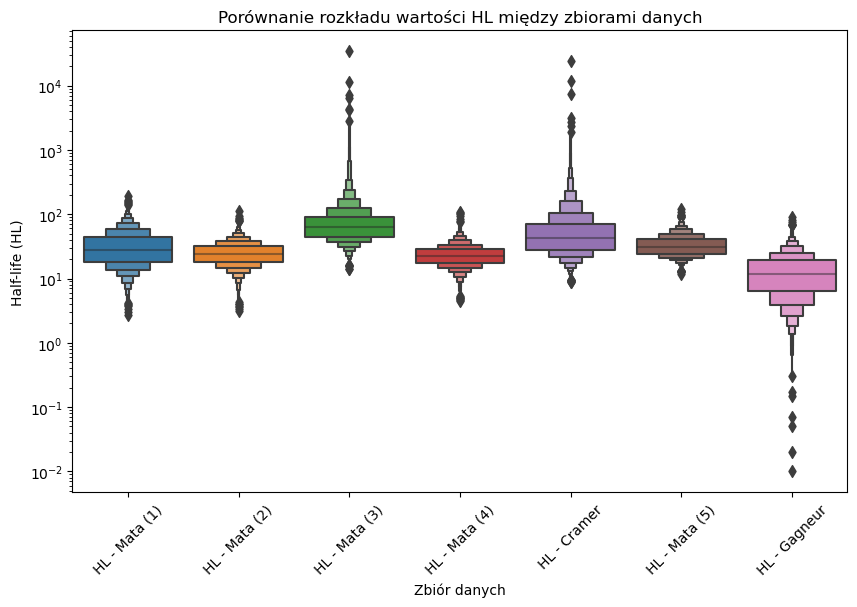

In [22]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x="Dataset", y="HL", data=melted)
plt.xticks(rotation=45)
plt.xlabel("Zbiór danych")
plt.yscale('log')
plt.ylabel("Half-life (HL)")
plt.title("Porównanie rozkładu wartości HL między zbiorami danych")
plt.show()

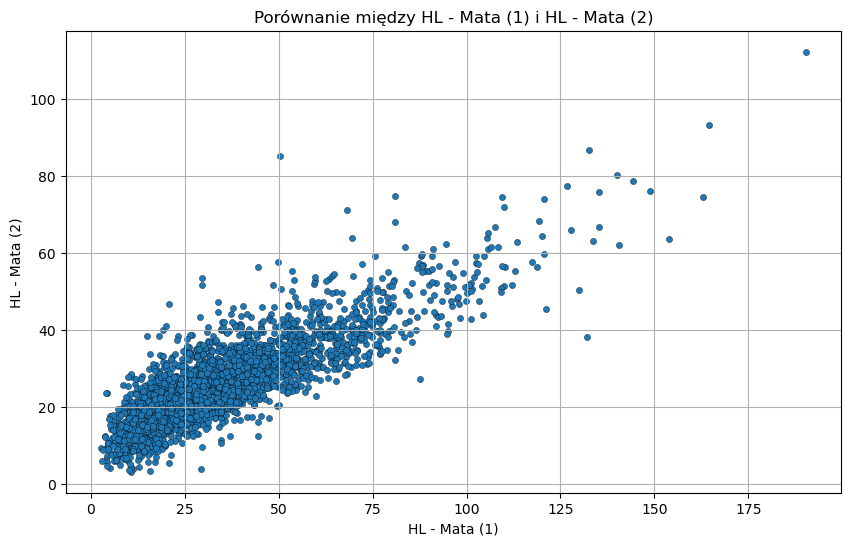

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x=converted['HL - Mata (1)'], y=converted['HL - Mata (2)'], marker='o', s=20,edgecolors='black',linewidths=0.25)
plt.xlabel("HL - Mata (1)")
plt.ylabel("HL - Mata (2)")
plt.title("Porównanie między HL - Mata (1) i HL - Mata (2)")
plt.grid(True)
plt.show()

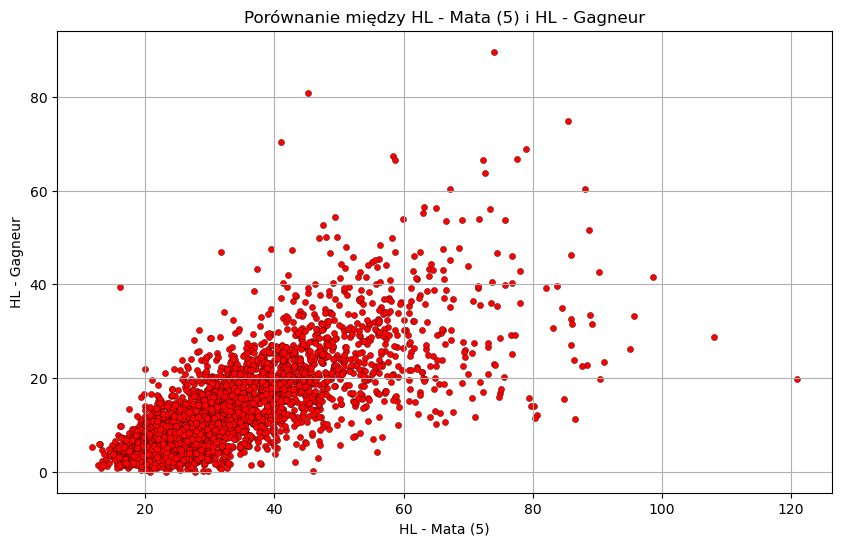

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x=converted['HL - Mata (5)'], y=converted['HL - Gagneur'], marker='o', s=20, c='red',edgecolors='black',linewidths=0.25)
plt.xlabel("HL - Mata (5)")
plt.ylabel("HL - Gagneur")
plt.title("Porównanie między HL - Mata (5) i HL - Gagneur")
plt.grid(True)
plt.show()

In [69]:
mean=(converted.iloc[:,1:].mean())

In [70]:
std=converted.iloc[:,1:].std()

In [71]:
lower_b = mean - 2.5*std
upper_b = mean + 2.5*std

In [72]:
mask = (converted.iloc[:, 1:] >= lower_b) & (converted.iloc[:, 1:] <= upper_b)

In [73]:
filtered=converted.iloc[:,1:][mask]

In [74]:
filtered.insert(0, 'Gene ID', altered['Gene ID'])

In [75]:
filtered=filtered.dropna()

In [92]:
filtered.sort_values('HL - Gagneur').head(10)

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
2964,SPBC19F5.01c,10.429179,18.858932,40.357093,20.129701,11.832997,20.646423,0.01
3153,SPBC25B2.08,17.819109,19.534847,35.124954,21.534451,15.219632,27.678389,0.02
4244,SPCC126.09,12.939000,11.160491,23.759853,8.684023,27.142173,23.153943,0.05
2263,SPAPB24D3.07c,39.041546,20.388388,83.709570,18.883170,50.305206,45.934481,0.07
3389,SPBC32C12.02,7.306090,9.951410,31.987287,11.071466,18.551011,29.779138,0.15
1259,SPAC29B12.08,4.471810,9.800059,19.359939,10.027662,17.942441,28.917087,0.17
3111,SPBC23E6.03c,26.601700,16.898920,91.374996,18.616551,153.168835,25.301867,0.30
1821,SPAC644.06c,14.338940,19.091570,45.433344,24.866545,13.757999,19.261469,0.35
4973,SPCC830.05c,17.999250,10.577031,53.319399,15.878412,17.517889,20.142050,0.36
2947,SPBC19C2.11c,12.992559,12.766161,26.199845,11.795928,15.544278,20.067431,0.45


In [97]:
filtered.sort_values('HL - Gagneur',ascending=False).head(10)

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
2118,SPAC977.14c,68.506210,36.290640,144.294771,35.117706,69.783612,41.981203,39.50
2417,SPBC1271.14,47.640305,29.600893,163.564877,33.471312,163.045626,51.471788,39.46
3699,SPBC530.12c,43.959675,22.723951,159.846603,24.404391,207.024147,45.231796,39.26
4047,SPBP35G2.07,42.932076,31.856388,180.050048,41.465177,291.450217,50.842098,39.11
869,SPAC227.10,74.768800,45.809303,132.173566,36.216794,380.789551,61.200789,39.11
659,SPAC19B12.06c,72.799095,40.379280,128.627178,34.747408,357.150881,57.998828,39.09
1670,SPAC4G9.10,61.064540,39.940860,123.647168,34.896959,191.572286,53.393987,38.81
1376,SPAC31A2.02,58.747738,42.206700,64.440774,24.989260,77.275746,64.690547,38.70
2841,SPBC1778.07,46.380085,25.870830,72.548102,28.116761,74.403068,36.883536,38.65
2562,SPBC1539.03c,52.097200,29.363380,148.917100,30.562843,130.439809,50.787217,38.64
